In [136]:
import matplotlib.pyplot as plt

from maploc.demo import Demo
from maploc.osm.viz import GeoPlotter
from maploc.osm.tiling import TileManager
from maploc.osm.viz import Colormap, plot_nodes
from maploc.utils.viz_2d import plot_images

from maploc.osm.download import get_osm

%load_ext autoreload
%autoreload 2
import torch
from torchvision import transforms
from PIL import Image
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# It will also download the experiment orienternet
demo = Demo(num_rotations=256, device="cpu")

In [115]:
proj, bbox = demo.read_input_image(
    prior_latlon=(46.223181, 6.068631),
    tile_size_meters=70,  # for VIGOR dataset
)

#epfl : 46.223181, 6.068631

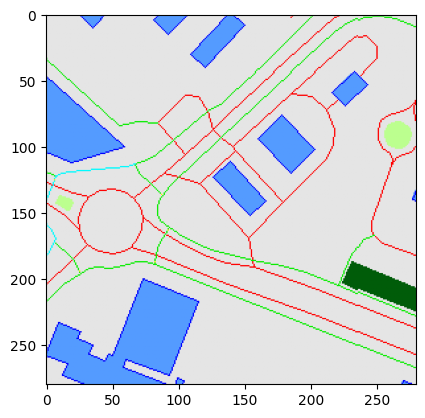

In [116]:
# We need to figure out pixe_per_meter for each dataset
ppm = 2 # To get 640x640 pixels at the end
tiler = TileManager.from_bbox(proj, bbox + 10, ppm)
canvas = tiler.query(bbox)
map_viz = Colormap.apply(canvas.raster)

plt.imshow(map_viz)

# feed canvas.raster

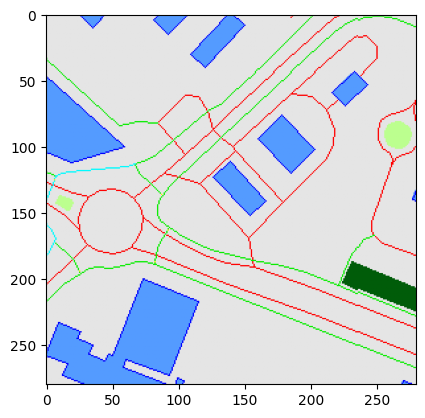

In [117]:
# We need to figure out pixe_per_meter for each dataset
ppm = 2 # To get 640x640 pixels at the end
tiler = TileManager.from_bbox(proj, bbox + 10, ppm)
canvas = tiler.query(bbox)
map_viz = Colormap.apply(canvas.raster)

plt.imshow(map_viz)

In [156]:
transform_sat = transforms.Compose([
    # resize
    transforms.Resize([512, 512]),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [158]:
raster = canvas.raster
tensor = torch.from_numpy(np.ascontiguousarray(raster)).float()
transform_sat(tensor).size()

torch.Size([3, 512, 512])

In [118]:
bbox_osm = proj.unproject(bbox + 10)
r = get_osm(bbox_osm)

In [119]:
len(r['elements'])

831

In [179]:
import os, pickle, gzip

root = "VIGOR"
city = "Chicago"
osm_tile_path = os.path.join(root, city, 'osm_tiles', 'data.pkl.gz')
with gzip.open(osm_tile_path, 'rb') as f:
    loaded_data = pickle.load(f)

satellite_41.85205407245264_-87.68899446364951.png



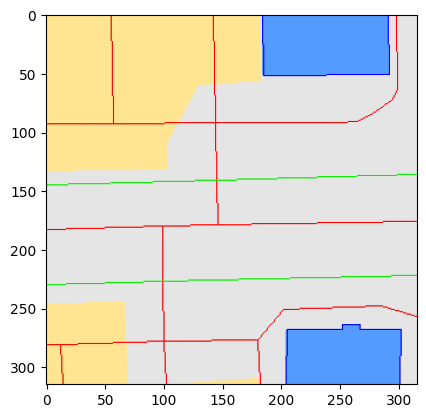

In [183]:
name, raster = loaded_data[5]
map_viz = Colormap.apply(raster)
print(name)
plt.imshow(map_viz)

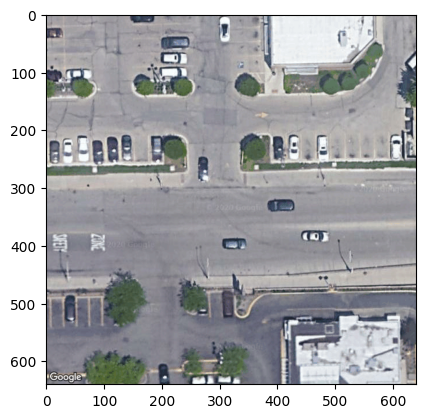

In [184]:
from PIL import Image

path = os.path.join('..', city, 'satellite', name[:-1])
# Load the PNG image
image = Image.open(path)
plt.imshow(image)